<a href="https://colab.research.google.com/github/rociotarda/TP1---Datos/blob/main/Analisis_exploratorio_Agus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


In [202]:
pip install squarify

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import squarify
  
train_labels = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
train_labels.head() 

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [204]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [205]:
avg_total_damage_grade = train_labels['damage_grade'].mean()
avg_total_damage_grade

2.2382723013342236

In [206]:
train_values = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
train_values.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [207]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [208]:
damage_level = train_labels['damage_grade'].value_counts().to_frame().sort_index()
damage_level

,damage_grade
1,25124
2,148259
3,87218


Text(0.5, 1.0, 'Cantidad de edificios vs Grado de daño')

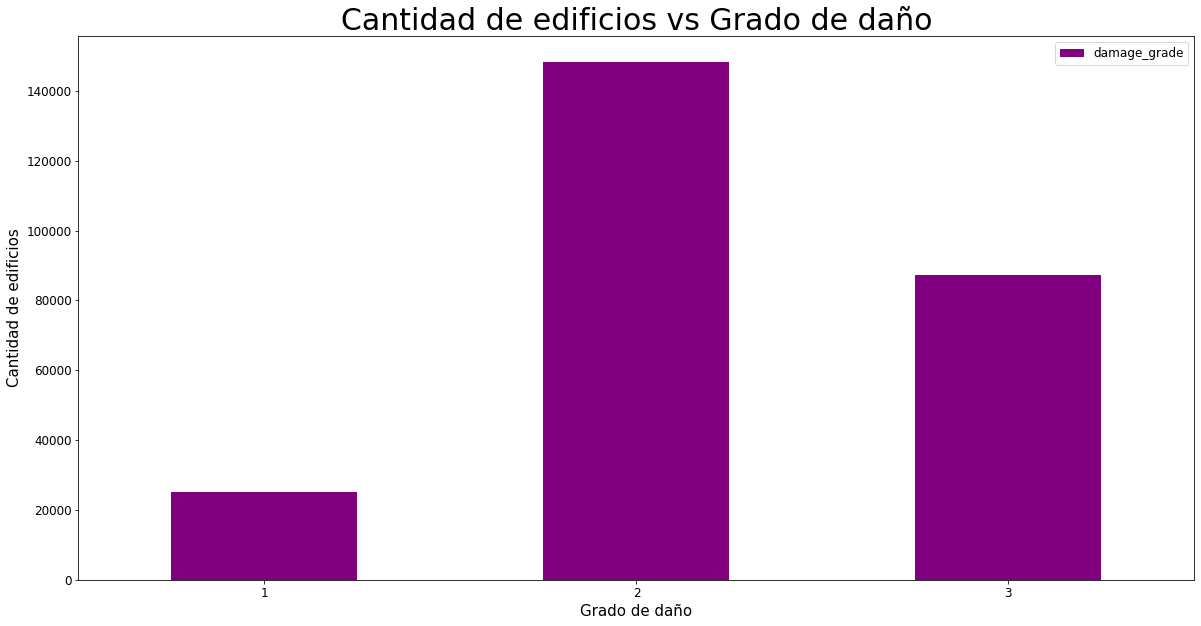

In [209]:
plot=damage_level.plot(kind='bar',color=['purple', 'blue', 'c'], figsize=(20,10))
plt.xlabel("Grado de daño", size=15)
plt.ylabel("Cantidad de edificios", size=15)
plt.xticks(rotation=0)
plt.title("Cantidad de edificios vs Grado de daño", size = 30)

In [210]:
train_values_filtered_with_damage_grade = train_values[['building_id','roof_type','ground_floor_type','other_floor_type','plan_configuration']].merge(train_labels,on='building_id', how='inner')
train_values_filtered_with_damage_grade.head()

,building_id,roof_type,ground_floor_type,other_floor_type,plan_configuration,damage_grade
0,802906,n,f,q,d,3
1,28830,n,x,q,d,2
2,94947,n,f,x,d,3
3,590882,n,f,x,d,2
4,201944,n,f,x,d,3


In [211]:
buildings_count = train_values_filtered_with_damage_grade['building_id'].count()
buildings_count

260601

#Tipo de techo

In [212]:
avg_damage_roof_type = train_values_filtered_with_damage_grade.groupby('roof_type').agg({'damage_grade':'mean','building_id':'count'})
avg_damage_roof_type['percentage'] = np.round((avg_damage_roof_type['building_id']/buildings_count)*100,decimals=1)
avg_damage_roof_type

,damage_grade,building_id,percentage
roof_type,,,
n,2.269637,182842,70.2
q,2.320173,61576,23.6
x,1.572267,16183,6.2


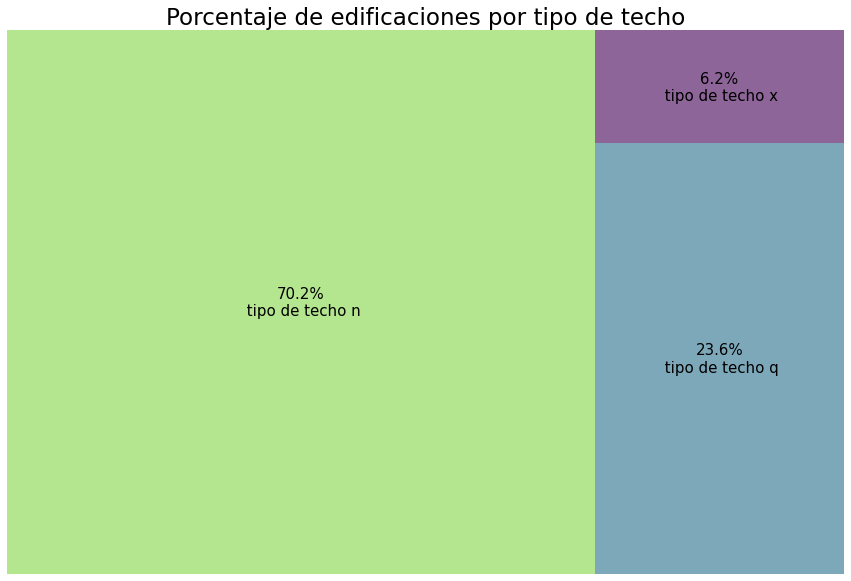

In [213]:
labels_foundations = [f'{percentage}%\n tipo de techo {index}' for  percentage, index in \
                      zip(avg_damage_roof_type.percentage, avg_damage_roof_type.index)]

plt.figure(figsize=(15, 10))
plt.rc('font', size=12)
squarify.plot(sizes=avg_damage_roof_type['percentage'], label=labels_foundations, alpha=0.61, text_kwargs={'fontsize':15})

plt.title("Porcentaje de edificaciones por tipo de techo",fontsize=23)
plt.axis('off')
plt.show()

Text(0.5, 0, 'Tipo de techo')

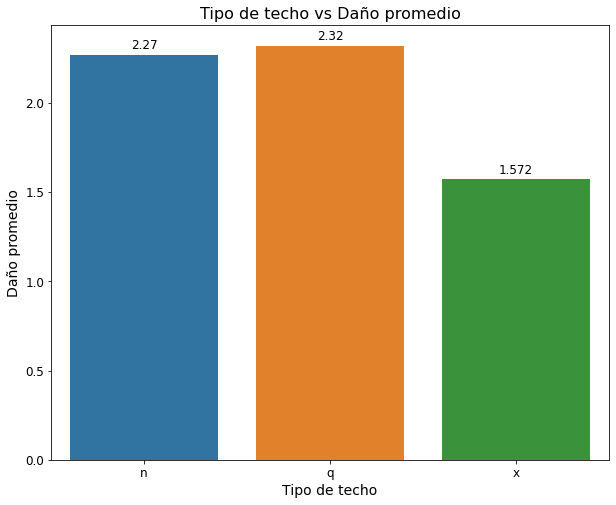

In [214]:
target = avg_damage_roof_type['damage_grade']
plt.subplots(figsize=(10,8))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(str(np.round(p.get_height(),decimals=3)),  (p.get_x() + p.get_width() / 2  , p.get_height()),ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Tipo de techo vs Daño promedio",fontsize=16)
grafico.set_ylabel("Daño promedio",fontsize=14)
grafico.set_xlabel("Tipo de techo",fontsize=14)

In [215]:
count_buildings_by_damage_roof_type =\
 train_values_filtered_with_damage_grade.rename(columns={'damage_grade':'Grado de daño'}).groupby(['roof_type','Grado de daño']).agg({'building_id':'count'}).reset_index()
count_buildings_by_damage_roof_type_pivot=count_buildings_by_damage_roof_type.pivot(index='roof_type', columns='Grado de daño', values='building_id')
count_buildings_by_damage_roof_type_pivot

Grado de daño,1,2,3
roof_type,,,
n,13547,106447,62848
q,3926,34009,23641
x,7651,7803,729


Text(0.5, 0, 'Tipo de techo')

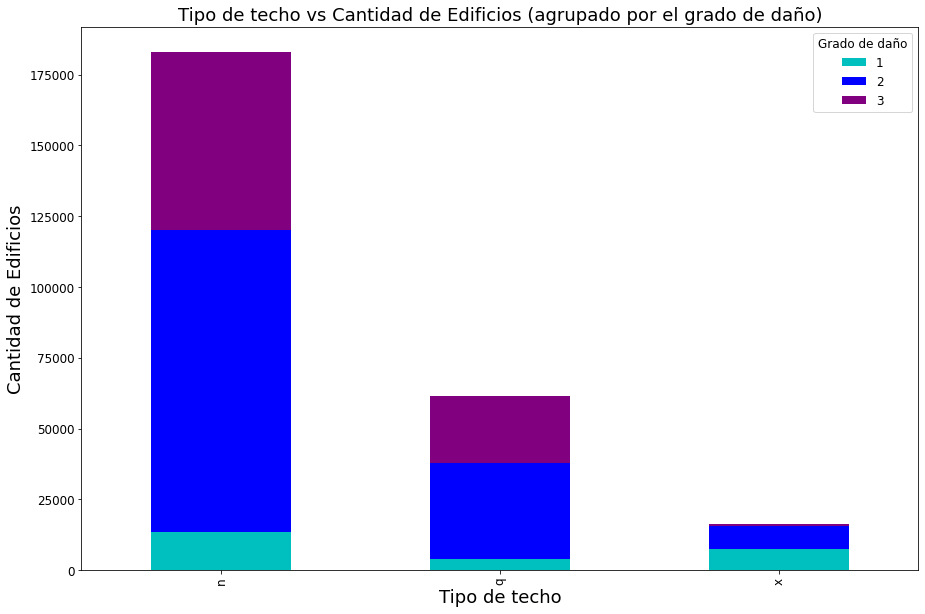

In [216]:
plot_damage_by_roof_type = count_buildings_by_damage_roof_type_pivot.plot.bar(stacked=True, figsize=(15,10), color=['c', 'blue', 'purple'])
plot_damage_by_roof_type.set_title("Tipo de techo vs Cantidad de Edificios (agrupado por el grado de daño)", fontsize=18)
plot_damage_by_roof_type.set_ylabel("Cantidad de Edificios", fontsize=18)
plot_damage_by_roof_type.set_xlabel("Tipo de techo", fontsize=18)

#Tipo de suelo en planta baja

In [217]:
avg_damage_ground_floor_type = train_values_filtered_with_damage_grade.groupby('ground_floor_type').agg({'damage_grade':'mean','building_id':'count'})
avg_damage_ground_floor_type['percentage'] = np.round((avg_damage_ground_floor_type['building_id']/buildings_count)*100,decimals=1)
avg_damage_ground_floor_type

,damage_grade,building_id,percentage
ground_floor_type,,,
f,2.309104,209619,80.4
m,1.970472,508,0.2
v,1.634205,24593,9.4
x,2.250714,24877,9.5
z,2.073705,1004,0.4


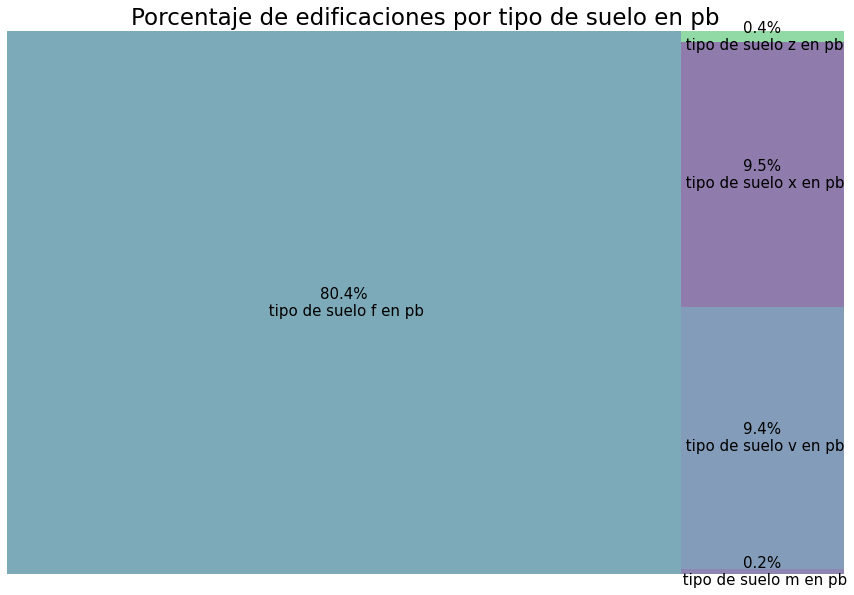

In [218]:
labels_foundations = [f'{percentage}%\n tipo de suelo {index} en pb' for  percentage, index in \
                      zip(avg_damage_ground_floor_type.percentage, avg_damage_ground_floor_type.index)]

plt.figure(figsize=(15, 10))
plt.rc('font', size=12)
squarify.plot(sizes=avg_damage_ground_floor_type['percentage'], label=labels_foundations, alpha=0.61, text_kwargs={'fontsize':15})

plt.title("Porcentaje de edificaciones por tipo de suelo en pb",fontsize=23)
plt.axis('off')
plt.show()

Text(0.5, 0, 'Tipo de suelo en plata baja')

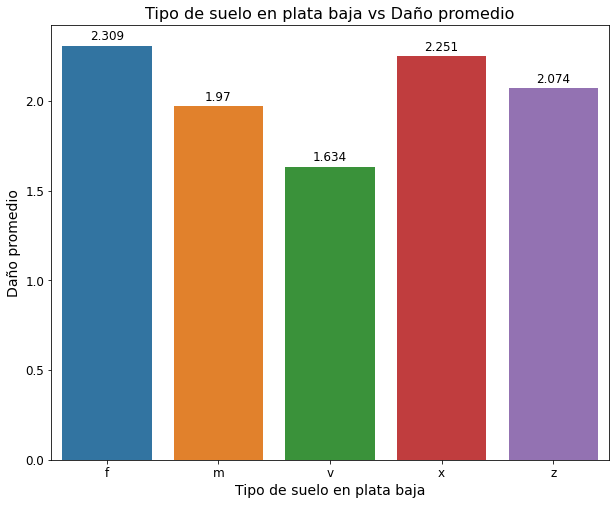

In [219]:
target = avg_damage_ground_floor_type['damage_grade']
plt.subplots(figsize=(10,8))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(str(np.round(p.get_height(),decimals=3)),  (p.get_x() + p.get_width() / 2  , p.get_height()),ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Tipo de suelo en plata baja vs Daño promedio",fontsize=16)
grafico.set_ylabel("Daño promedio",fontsize=14)
grafico.set_xlabel("Tipo de suelo en plata baja",fontsize=14)

In [220]:
count_buildings_by_ground_floor_type =\
 train_values_filtered_with_damage_grade.rename(columns={'damage_grade':'Grado de daño'}).groupby(['ground_floor_type','Grado de daño']).agg({'building_id':'count'}).reset_index()
count_buildings_by_ground_floor_type_pivot=count_buildings_by_ground_floor_type.pivot(index='ground_floor_type', columns='Grado de daño', values='building_id')
count_buildings_by_ground_floor_type_pivot

Grado de daño,1,2,3
ground_floor_type,,,
f,12474,119877,77268
m,90,343,75
v,10309,12971,1313
x,2052,14536,8289
z,199,532,273


Text(0.5, 0, 'Tipo de suelo en plata baja')

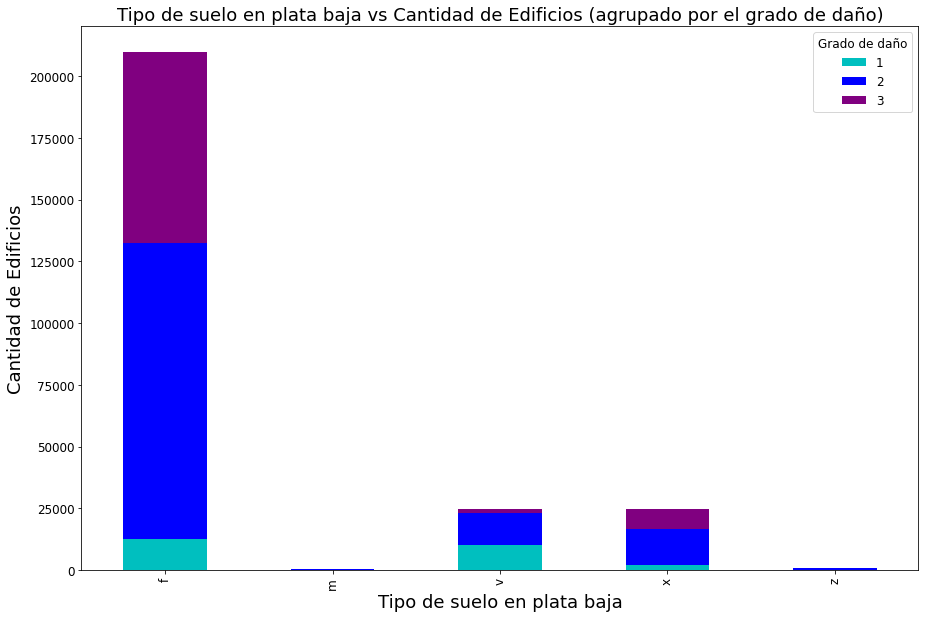

In [221]:

plot_damage_by_ground_floor_type = count_buildings_by_ground_floor_type_pivot.plot.bar(stacked=True, figsize=(15,10), color=['c', 'blue', 'purple'])
plot_damage_by_ground_floor_type.set_title("Tipo de suelo en plata baja vs Cantidad de Edificios (agrupado por el grado de daño)", fontsize=18)
plot_damage_by_ground_floor_type.set_ylabel("Cantidad de Edificios", fontsize=18)
plot_damage_by_ground_floor_type.set_xlabel("Tipo de suelo en plata baja", fontsize=18)

#Tipo de suelo en otros pisos

In [222]:
avg_damage_other_floor_type = train_values_filtered_with_damage_grade.groupby('other_floor_type').agg({'damage_grade':'mean','building_id':'count'})
avg_damage_other_floor_type['percentage'] = np.round((avg_damage_other_floor_type['building_id']/buildings_count)*100, decimals=1)
avg_damage_other_floor_type

,damage_grade,building_id,percentage
other_floor_type,,,
j,2.042893,39843,15.3
q,2.315751,165282,63.4
s,1.607416,12028,4.6
x,2.297344,43448,16.7


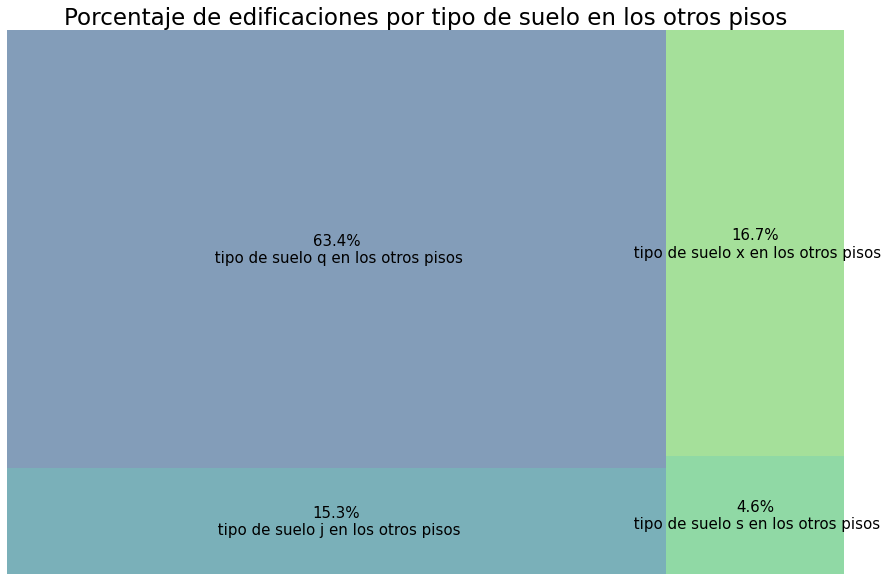

In [223]:
labels_foundations = [f'{percentage}%\n tipo de suelo {index} en los otros pisos' for  percentage, index in \
                      zip(avg_damage_other_floor_type.percentage, avg_damage_other_floor_type.index)]

plt.figure(figsize=(15, 10))
plt.rc('font', size=12)
squarify.plot(sizes=avg_damage_other_floor_type['percentage'], label=labels_foundations, alpha=0.61, text_kwargs={'fontsize':15})

plt.title("Porcentaje de edificaciones por tipo de suelo en los otros pisos",fontsize=23)
plt.axis('off')
plt.show()

Text(0.5, 0, 'Tipo de suelo para otros pisos')

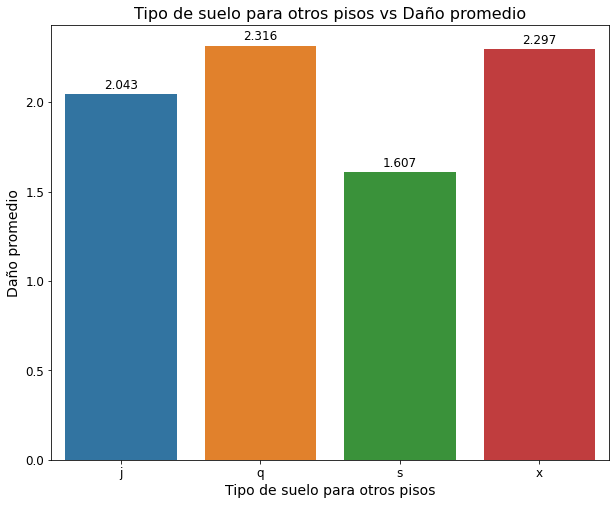

In [224]:
target = avg_damage_other_floor_type['damage_grade']
plt.subplots(figsize=(10,8))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(str(np.round(p.get_height(),decimals=3)),  (p.get_x() + p.get_width() / 2  , p.get_height()),ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Tipo de suelo para otros pisos vs Daño promedio",fontsize=16)
grafico.set_ylabel("Daño promedio",fontsize=14)
grafico.set_xlabel("Tipo de suelo para otros pisos",fontsize=14)

In [225]:
count_buildings_by_damage_other_floor_type =\
 train_values_filtered_with_damage_grade.rename(columns={'damage_grade':'Grado de daño'}).groupby(['other_floor_type','Grado de daño']).agg({'building_id':'count'}).reset_index()
count_buildings_by_damage_other_floor_type_pivot=count_buildings_by_damage_other_floor_type.pivot(index='other_floor_type', columns='Grado de daño', values='building_id')
count_buildings_by_damage_other_floor_type_pivot

Grado de daño,1,2,3
other_floor_type,,,
j,8886,20362,10595
q,7387,98320,59575
s,5423,5904,701
x,3428,23673,16347


Text(0.5, 0, 'Tipo de suelo para otros pisos')

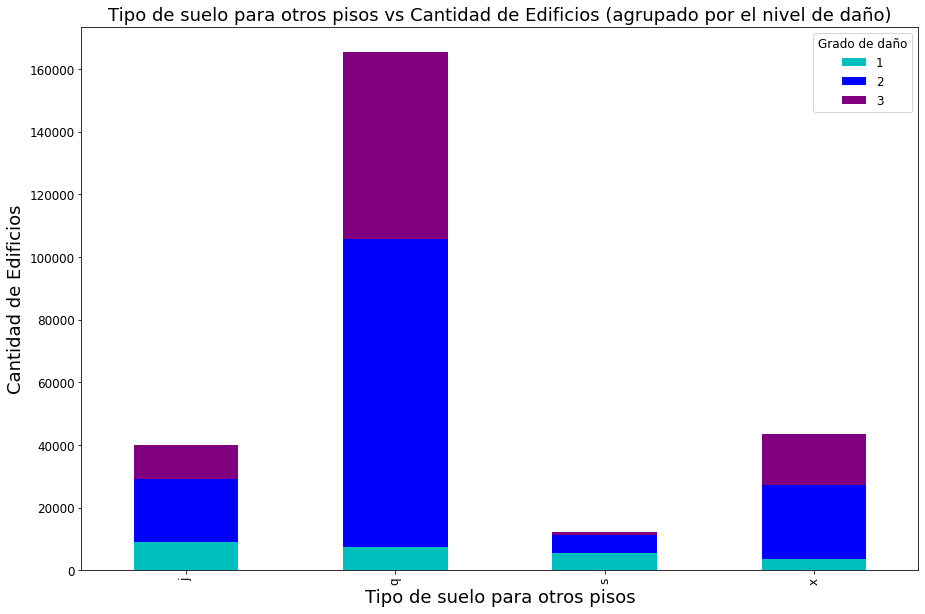

In [226]:
plot_damage_by_other_floor_type = count_buildings_by_damage_other_floor_type_pivot.plot.bar(stacked=True, figsize=(15,10), color=['c', 'blue', 'purple'])
plot_damage_by_other_floor_type.set_title("Tipo de suelo para otros pisos vs Cantidad de Edificios (agrupado por el nivel de daño)", fontsize=18)
plot_damage_by_other_floor_type.set_ylabel("Cantidad de Edificios", fontsize=18)
plot_damage_by_other_floor_type.set_xlabel("Tipo de suelo para otros pisos", fontsize=18)


In [227]:
avg_damage_plan_configuration = train_values_filtered_with_damage_grade.groupby('plan_configuration').agg({'damage_grade':'mean','building_id':'count'})
avg_damage_plan_configuration['percentage'] = np.round((avg_damage_plan_configuration['building_id']/buildings_count)*100,decimals=2)
avg_damage_plan_configuration

,damage_grade,building_id,percentage
plan_configuration,,,
a,1.853175,252,0.10
c,1.836923,325,0.12
d,2.243646,250072,95.96
f,2.272727,22,0.01
m,1.913043,46,0.02
n,2.157895,38,0.01
o,1.893082,159,0.06
q,2.271434,5692,2.18
s,2.049133,346,0.13


#Formato de constuccion

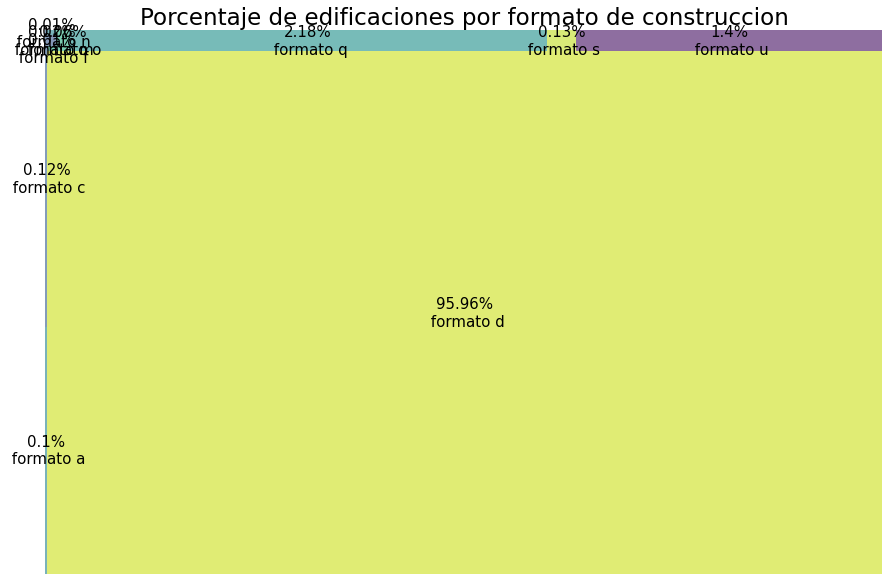

In [228]:
labels_foundations = [f'{percentage}%\n formato {index}' for  percentage, index in \
                      zip(avg_damage_plan_configuration.percentage, avg_damage_plan_configuration.index)]

plt.figure(figsize=(15, 10))
plt.rc('font', size=12)
squarify.plot(sizes=avg_damage_plan_configuration['percentage'], label=labels_foundations, alpha=0.61, text_kwargs={'fontsize':15})

plt.title("Porcentaje de edificaciones por formato de construccion",fontsize=23)
plt.axis('off')
plt.show()

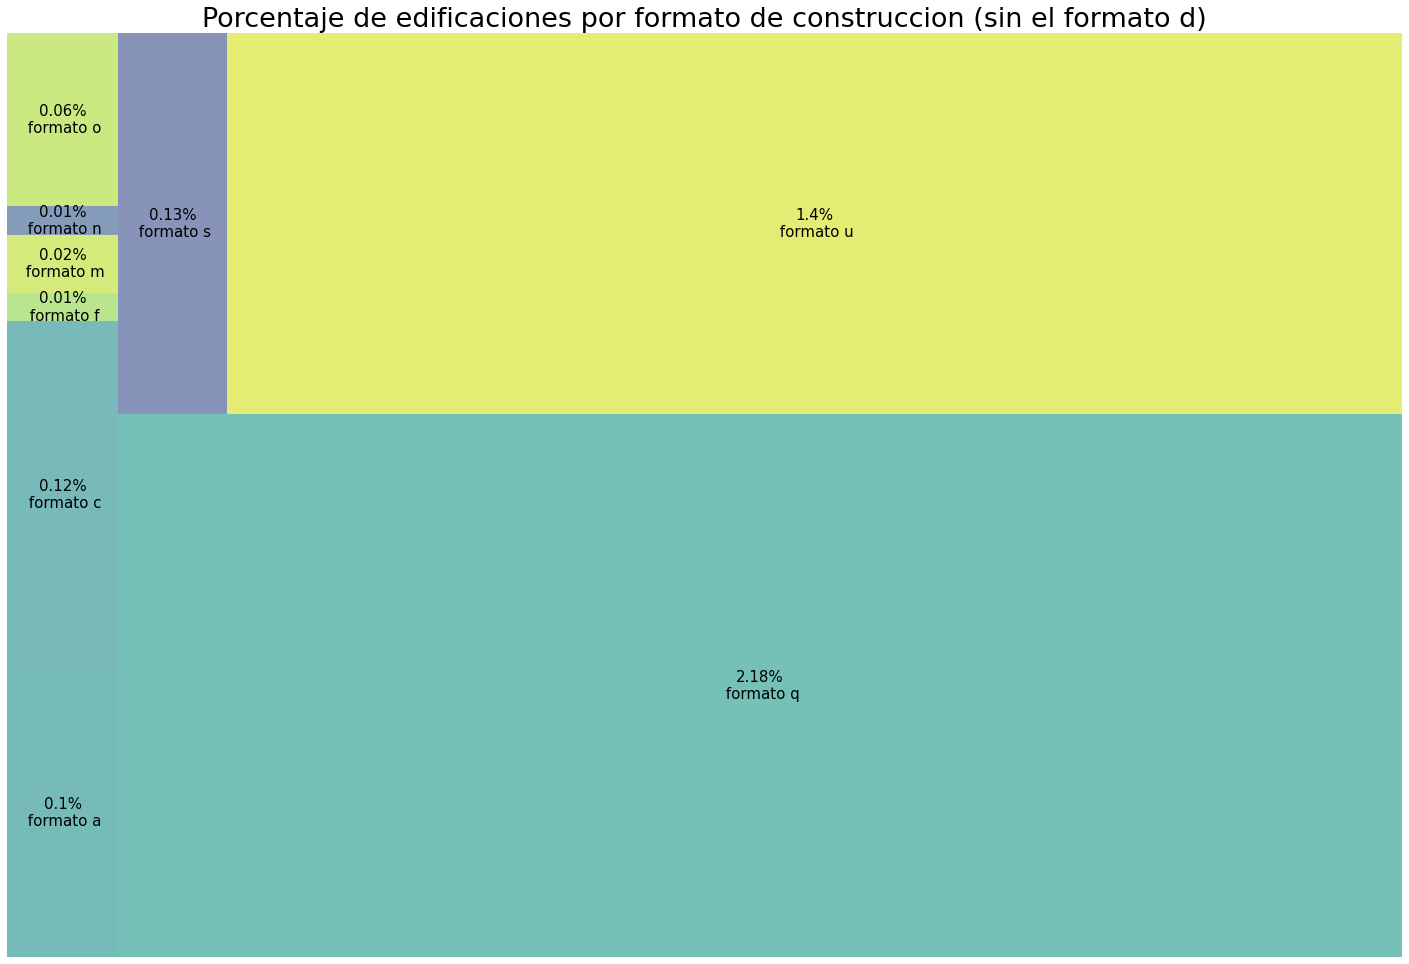

In [229]:
avg_damage_plan_configuration_without_config_d =\
  avg_damage_plan_configuration[avg_damage_plan_configuration.index != 'd']

labels_foundations = [f'{percentage}%\n formato {index}' for  percentage, index in \
                      zip(avg_damage_plan_configuration_without_config_d.percentage, avg_damage_plan_configuration_without_config_d.index)]

plt.figure(figsize=(25, 17))
plt.rc('font', size=12)
squarify.plot(sizes=avg_damage_plan_configuration_without_config_d['percentage'], label=labels_foundations, alpha=0.61, text_kwargs={'fontsize':15})

plt.title("Porcentaje de edificaciones por formato de construccion (sin el formato d)",fontsize=27)
plt.axis('off')
plt.show()

Text(0.5, 0, 'Formato de construccion')

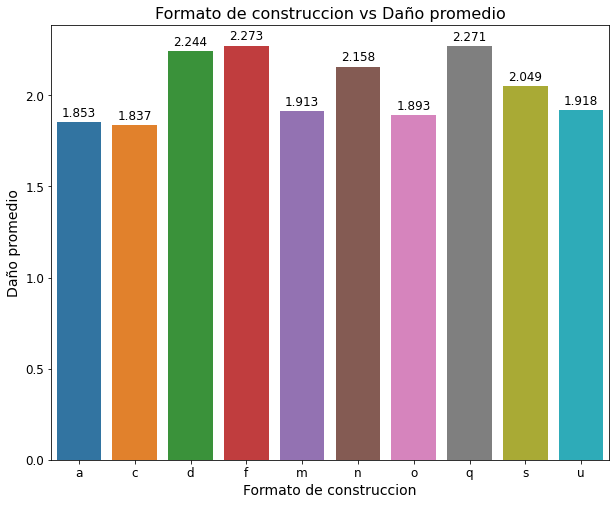

In [230]:
target = avg_damage_plan_configuration['damage_grade'] 
plt.subplots(figsize=(10,8))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(str(np.round(p.get_height(),decimals=3)),  (p.get_x() + p.get_width() / 2  , p.get_height()),ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Formato de construccion vs Daño promedio",fontsize=16)
grafico.set_ylabel("Daño promedio",fontsize=14)
grafico.set_xlabel("Formato de construccion",fontsize=14)

In [231]:
buildings_with_d_plan_config =\
  train_values_filtered_with_damage_grade[train_values_filtered_with_damage_grade['plan_configuration']=='d']
percent_of_d_plan_config_buildings = (buildings_with_d_plan_config['plan_configuration'].count()/train_values_filtered_with_damage_grade['plan_configuration'].count()) * 100
percent_of_d_plan_config_buildings

95.95972386905652

In [232]:
count_buildings_by_damage_plan_configuration =\
 train_values_filtered_with_damage_grade.rename(columns={'damage_grade':'Grado de daño'}).groupby(['plan_configuration','Grado de daño']).agg({'building_id':'count'}).reset_index()
count_buildings_by_damage_plan_configuration_pivot=count_buildings_by_damage_plan_configuration.pivot(index='plan_configuration', columns='Grado de daño', values='building_id')
count_buildings_by_damage_plan_configuration_pivot

Grado de daño,1,2,3
plan_configuration,,,
a,66.0,157.0,29.0
c,86.0,206.0,33.0
d,23310.0,142523.0,84239.0
f,NaN,16.0,6.0
m,8.0,34.0,4.0
n,6.0,20.0,12.0
o,40.0,96.0,23.0
q,781.0,2585.0,2326.0
s,53.0,223.0,70.0


Text(0.5, 0, 'Formato de construccion')

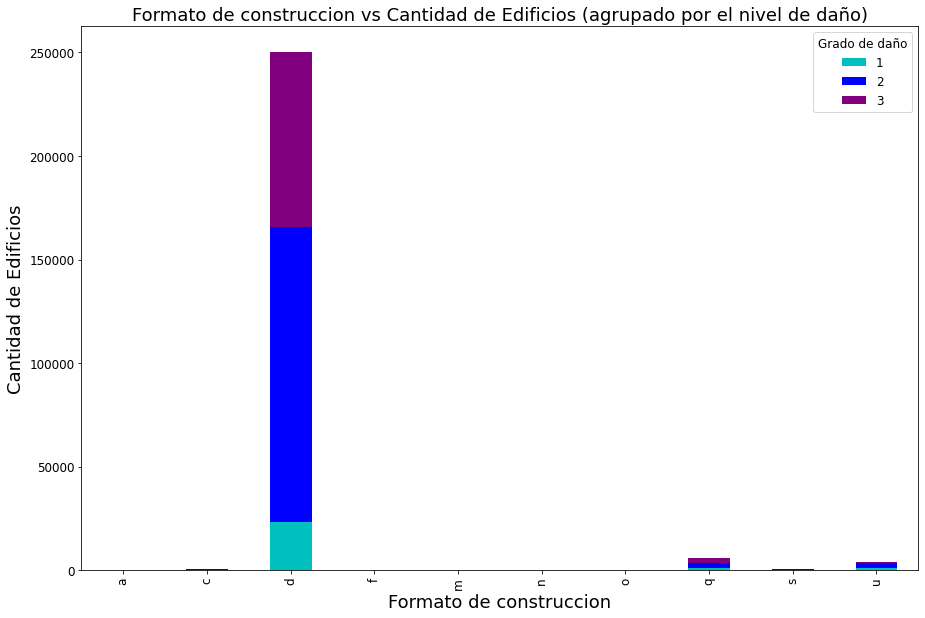

In [233]:
plot_damage_by_plan_configuration = count_buildings_by_damage_plan_configuration_pivot.plot.bar(stacked=True, figsize=(15,10), color=['c', 'blue', 'purple'])
plot_damage_by_plan_configuration.set_title("Formato de construccion vs Cantidad de Edificios (agrupado por el nivel de daño)", fontsize=18)
plot_damage_by_plan_configuration.set_ylabel("Cantidad de Edificios", fontsize=18)
plot_damage_by_plan_configuration.set_xlabel("Formato de construccion", fontsize=18)

In [234]:
buildings_without_d_plan_config =\
  train_values_filtered_with_damage_grade[train_values_filtered_with_damage_grade['plan_configuration']!='d']
count_buildings_by_damage_plan_configuration_without_d =\
 buildings_without_d_plan_config.rename(columns={'damage_grade':'Grado de daño'}).groupby(['plan_configuration','Grado de daño']).agg({'building_id':'count'}).reset_index()
count_buildings_by_damage_plan_configuration_without_d_pivot=count_buildings_by_damage_plan_configuration_without_d.pivot(index='plan_configuration', columns='Grado de daño', values='building_id')
count_buildings_by_damage_plan_configuration_without_d_pivot

Grado de daño,1,2,3
plan_configuration,,,
a,66.0,157.0,29.0
c,86.0,206.0,33.0
f,NaN,16.0,6.0
m,8.0,34.0,4.0
n,6.0,20.0,12.0
o,40.0,96.0,23.0
q,781.0,2585.0,2326.0
s,53.0,223.0,70.0
u,774.0,2399.0,476.0


Text(0.5, 0, 'Formato de construccion')

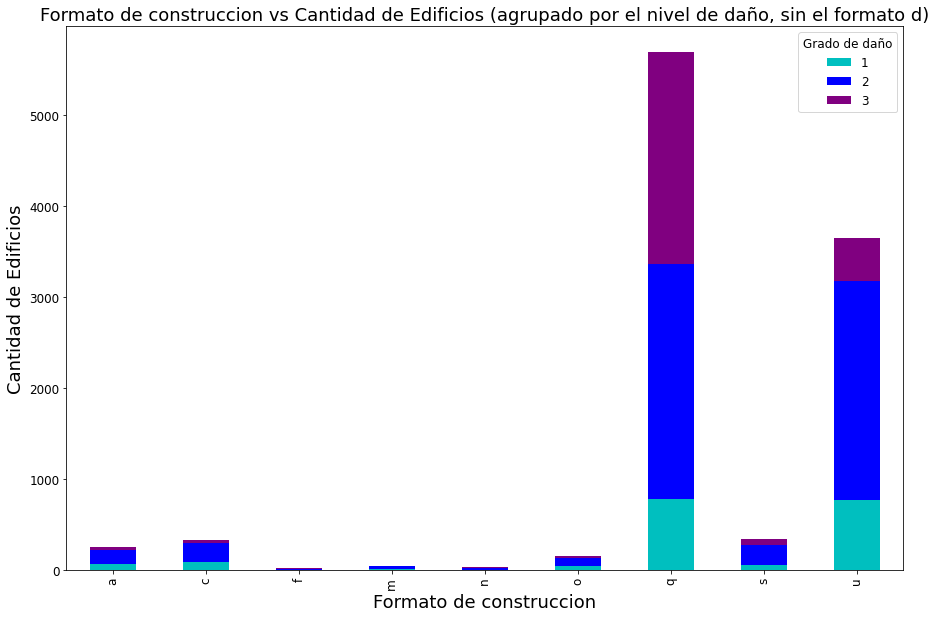

In [235]:
plot_damage_by_plan_configuration = count_buildings_by_damage_plan_configuration_without_d_pivot.plot.bar(stacked=True, figsize=(15,10), color=['c', 'blue', 'purple'])
plot_damage_by_plan_configuration.set_title("Formato de construccion vs Cantidad de Edificios (agrupado por el nivel de daño, sin el formato d)", fontsize=18)
plot_damage_by_plan_configuration.set_ylabel("Cantidad de Edificios", fontsize=18)
plot_damage_by_plan_configuration.set_xlabel("Formato de construccion", fontsize=18)